### Part 2: Cluster Analysis

In [81]:
import sys
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from itertools import combinations

In [3]:
# Return a pandas dataframe containing the data set that needs to be extracted from the data_file.
# data_file will be populated with the string 'wholesale_customers.csv'.
def read_csv_2(data_file):
      
    df = pd.read_csv(data_file,index_col=False, skipinitialspace = True)
    df = df.drop(['Channel', 'Region'], axis=1)    
    df.replace(to_replace=[r' ?', r'?', r'? ', r' ', r''], 
               value=[np.nan, np.nan, np.nan, np.nan, np.nan], regex=False, inplace=True)
    
    return df

In [25]:
# Return a pandas dataframe with summary statistics of the data.
# Namely, 'mean', 'std' (standard deviation), 'min', and 'max' for each attribute.
# These strings index the new dataframe columns. 
# Each row should correspond to an attribute in the original data and be indexed with the attribute name.
def summary_statistics(df):
    
    index_labels=['mean', 'std', 'min', 'max']
    df_summary = pd.DataFrame([round(df.mean()).astype(int), round(df.std()).astype(int), 
                               round(df.min()).astype(int), round(df.max()).astype(int) ], 
                              index=index_labels)
    
    return df_summary

In [15]:
# Given a dataframe df with numeric values, return a dataframe (new copy)
# where each attribute value is subtracted by the mean and then divided by the
# standard deviation for that attribute.
def standardize(df):
    
    df_summary = summary_statistics(df)
    for column in df.columns:
        df[column] = (df[column] - df_summary[column]['mean'])/df_summary[column]['std']
    
    return df

In [6]:
# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans.
# y should contain values in the set {0,1,...,k-1}.
def kmeans(df, k):
    # source: https://realpython.com/k-means-clustering-python/
    kmeans = KMeans( init="random", n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(df)
    
    return pd.Series(kmeans.labels_)

In [7]:
# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using kmeans++.
# y should contain values from the set {0,1,...,k-1}.
def kmeans_plus(df, k):
	pass

In [8]:
# Given a dataframe df and a number of clusters k, return a pandas series y
# specifying an assignment of instances to clusters, using agglomerative hierarchical clustering.
# y should contain values from the set {0,1,...,k-1}.
def agglomerative(df, k):
    
    agglomerative = AgglomerativeClustering(n_clusters = k)
    agglomerative.fit(df)
       
    return pd.Series(agglomerative.labels_)

In [9]:
# Given a data set X and an assignment to clusters y
# return the Solhouette score of the clustering.
def clustering_score(X,y):
    
    silhouette_scores = silhouette_score(X, y)
    
    return silhouette_scores

In [10]:
# Perform the cluster evaluation described in the coursework description.
# Given the dataframe df with the data to be clustered,
# return a pandas dataframe with an entry for each clustering algorithm execution.
# Each entry should contain the: 
# 'Algorithm' name: either 'Kmeans' or 'Agglomerative', 
# 'data' type: either 'Original' or 'Standardized',
# 'k': the number of clusters produced,
# 'Silhouette Score': for evaluating the resulting set of clusters.
def cluster_evaluation(df):
	pass

In [11]:
# Given the performance evaluation dataframe produced by the cluster_evaluation function,
# return the best computed Silhouette score.
def best_clustering_score(rdf):
	pass

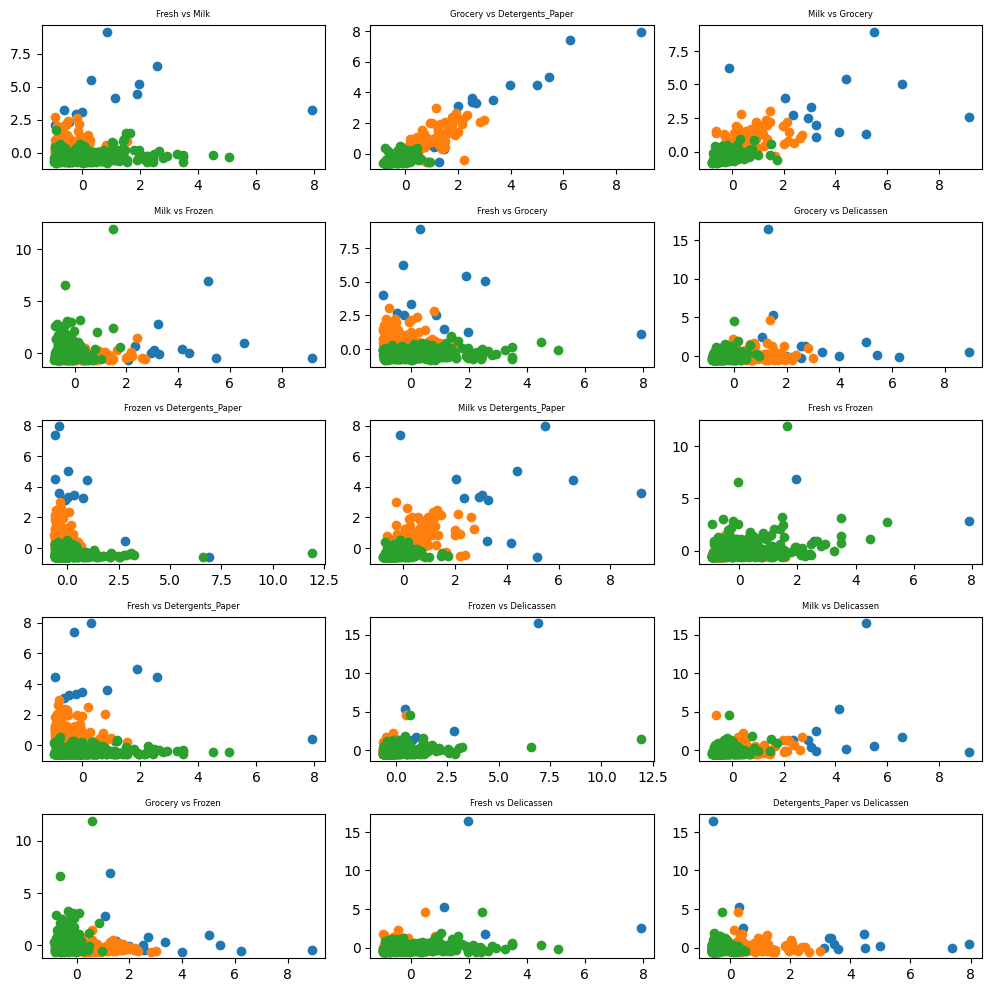

In [127]:
# Run some clustering algorithm of your choice with k=3 and generate a scatter plot for each pair of attributes.
# Data points in different clusters should appear with different colors.
def scatter_plots(df):
    
    cdict = {0: 'red', 1: 'blue', 2: 'green'}
    #print(cdict)
    group = kmeans(df, 3)
    #print(group)
    
    fig, ax = plt.subplots(5,3, figsize =(10, 10))
    
    # Get all permutations of and length 2
    comb = combinations(range(df.shape[1]), 2)
    
    plotIdxRow = [row for row in range(5)]
    plotIdxCol = [column for column in range(3)]
    plotIdx = 0
    
    for combi in list(comb):
        # print(combi)
        scatter_x = np.array(df.iloc[:, combi[0]]) #np.array([1,2,3,4,5])
        scatter_y = np.array(df.iloc[:, combi[1]]) #np.array([5,4,3,2,1])
        name = df.columns[combi[0]] + ' vs ' + df.columns[combi[1]]
        
        for g in np.unique(group):
            i = np.where(group == g)
            ax[plotIdxRow[plotIdx%5]][plotIdx%3].scatter(scatter_x[i], scatter_y[i], label=g)
            ax[plotIdxRow[plotIdx%5]][plotIdx%3].set_title(name, size=6)
        # ax[0][0].legend()
        
        plotIdx = plotIdx + 1
        
    fig.tight_layout(pad=1.0) 
    plt.show()
    

    
scatter_plots(dfstd)

### Answers

In [12]:
df = read_csv_2('Wholesale customers data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [13]:
df.head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788


In [16]:
# 1. [10 points] Compute the mean, standard deviation, minimum, and maximum value for each
# attribute. Round the mean and standard deviation to the closest integers.
df_summary = summary_statistics(df)
df_summary.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,12000,5796,7951,3071,2881,1524
std,12647,7380,9503,4854,4767,2820
min,3,55,3,25,3,3
max,112151,73498,92780,60869,40827,47943


In [19]:
# 2. [20 points] Divide the data points into k clusters, for k ∈ {3, 5, 10}, using 
# kmeans and agglomerative hierarchical clustering. 
# Because the performance of kmeans (e.g. number of iterations) is significantly affected 
# by the initial cluster center selection, repeat 10 executions of kmeans for each k value. 
k = (3, 5, 10)

print('k mean clustering:\n')
for k_i in k:
    for i in range(10):
        y = kmeans(df, k_i)
        # print(y)

print('\nagglomerative hierarchical clustering:\n')
for k_i in k:
    c = agglomerative(df, k_i)
    # print(c)



k mean clustering:


agglomerative hierarchical clustering:



In [20]:
# Next, standardize each attribute value by subtracting with the mean and then
# dividing with the standard deviation for that attribute. 
dfstd = standardize(df)
dfstd.head(4)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052898,0.523035,-0.041040,-0.588587,-0.043424,-0.065957
1,-0.390844,0.543902,0.170157,-0.269674,0.086428,0.089362
2,-0.446509,0.408130,-0.028096,-0.137206,0.133207,2.241135
3,0.100024,-0.623306,-0.392508,0.686650,-0.498007,0.093617


In [26]:
dfstd_summary = summary_statistics(dfstd)
dfstd_summary.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
mean,0,0,0,0,0,0
std,1,1,1,1,1,1
min,-1,-1,-1,-1,-1,-1
max,8,9,9,12,8,16


In [27]:
# Repeat the previous kmeans and agglomerative hierarchical clustering executions 
# with the standardized data set. 
k = (3, 5, 10)
print('k mean clustering:\n')
for k_i in k:
    for i in range(10):
        y = kmeans(dfstd, k_i)
        # print(y)
        scoreKmean = clustering_score(dfstd,y)
        print(scoreKmean)
        
print('\nagglomerative hierarchical clustering:\n')        
for k_i in k:
    c = agglomerative(dfstd, k_i)
    # print(c)
    scoreAgglomerative = clustering_score(dfstd,c)
    print(scoreAgglomerative)

k mean clustering:

0.53913106645641
0.53913106645641
0.5433892466429201
0.33392224634163403
0.5482912545806091
0.33392224634163403
0.5424057208515124
0.3396925980040233
0.33392224634163403
0.34777580400322394
0.37162866546610884
0.3515678964407184
0.36364688679011864
0.37162866546610884
0.366305378582864
0.36364688679011864
0.3515678964407184
0.366305378582864
0.36364688679011864
0.3647144749595107
0.29141852061010265
0.3110496188308642
0.24270901123990593
0.30354203571117117
0.29141852061010265
0.21132201675582607
0.30393792803835334
0.3044781354910403
0.28614078660961484
0.30403827274821643

agglomerative hierarchical clustering:

0.26461244827813024
0.2398816349597083
0.27954308506388986


In [ ]:
# Identify which run resulted in the best set of clusters using the Silhouette score 
# as your evaluation metric. 


In [ ]:
# Visualize the best set of clusters computed in the previous question. 
# For this, construct a scatterplot for each pair of attributes using Pyplot. 
# Therefore, 15 scatter plots should be constructed in total.
# Different clusters should appear with different colors in each scatter plot. Note that these plots
# could be used to manually assess how well the clusters separate the data points.